# Definition

A random variable is characterized by its possible values and its probability distribution, which assigns a probability for each possible value. Each observation of the random variable results in a random number, and the distribution of the observed values are described by the probability distribution. There are two main types of distributions, discrete and continuous distributions, which are integer valued and real valued, respectively. When working with statistics, dealing with random variables is of central importance, and in practice this often means working with probability distributions. The SciPy stats module provides classes for representing random variables with a large number of probability distributions. There are two base classes for discrete and continuous random variables: rv_discrete and rv_continuous. 

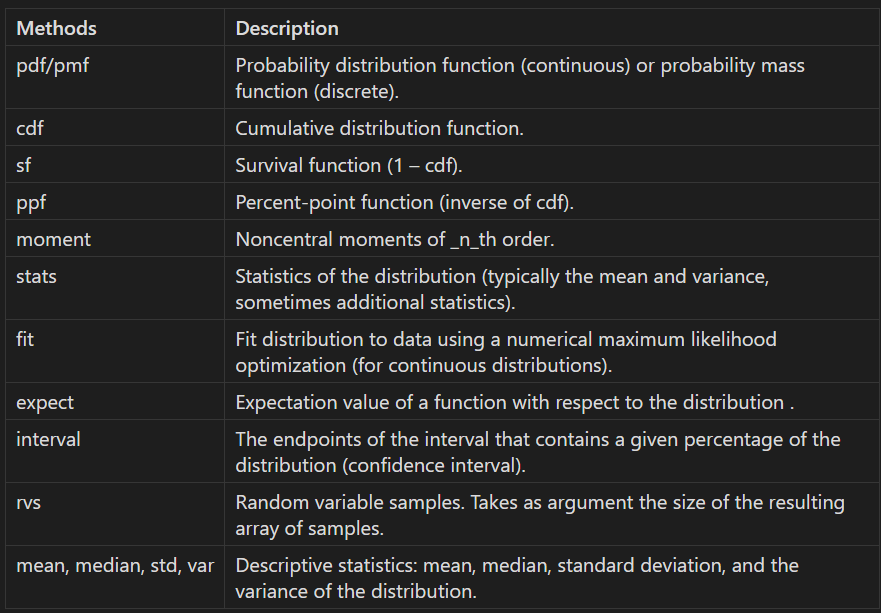


In [1]:
# import libraries
from scipy import stats
from scipy import optimize
from scipy.stats import gaussian_kde

import numpy as np
import matplotlib.pyplot as plt
    
import seaborn as sns
sns.set(style="whitegrid")

Following example where we create a normal distributed random variable with mean 1.0 and standard deviation 0.5:


In [2]:
X = stats.norm(1, 0.5)

X is an object that represents a random variable, and we can compute descriptive statistics of this random variable using, for example, the mean, median, std, and var methods :

In [3]:
print(X.mean())
print(X.median())
print(X.std())
print(X.var())

1.0
1.0
0.5
0.25


Noncentral moments of arbitrary order can be computed with the moment method :

In [4]:
[X.moment(n) for n in range(5)]

[1.0, 1.0, 1.25, 1.75, 2.6875]

We can obtain a distribution-dependent list of statistics using the stats method

In [5]:
X.stats()

(1.0, 0.25)

We can evaluate the probability distribution function, the cumulative distribution function, the survival function, etc., using the methods pdf,  cdf, sf, etc. These all take a value, or an array of values, at which to evaluate the function:

In [6]:
X.pdf([0, 1, 2])

array([0.10798193, 0.79788456, 0.10798193])

In [7]:
X.cdf([0, 1, 2])

array([0.02275013, 0.5       , 0.97724987])

The interval method can be used to compute the lower and upper values of x such that a given percentage of the probability distribution falls within the interval (lower, upper). This method is useful for computing confidence intervals and for selecting a range of x values for plotting:

In [8]:
X.interval(0.95)

(0.020018007729972975, 1.979981992270027)

In [9]:
X.interval(0.99)

(-0.2879146517744502, 2.28791465177445)

## Graph

The properties of a probability distribution, it is useful to graph it.

we first create a function plot_rv_distribution that plots the result of pdf or pmf, the cdf and sf, and ppf methods of the SciPy stats random variable objects, over an interval that contains 99.9% of the probability distribution function. We also highlight the area that contains 95% of the probability distribution using the fill_between drawing method:

In [10]:
def plot_rv_distribution(X, axes=None):
    """Plot the PDF or PMF, CDF, SF and PPF of a given random variable"""
    if axes is None:
        fig, axes = plt.subplots(1, 3, figsize=(12, 3))

    x_min_999, x_max_999 = X.interval(0.999)
    x999 = np.linspace(x_min_999, x_max_999, 1000)
    x_min_95, x_max_95 = X.interval(0.95)
    x95 = np.linspace(x_min_95, x_max_95, 1000)

    if hasattr(X.dist, "pdf"):
        axes[0].plot(x999, X.pdf(x999), label="PDF")
        axes[0].fill_between(x95, X.pdf(x95), alpha=0.25)
    else:
        # discrete random variables do not have a pdf method, instead we use pmf:
        x999_int = np.unique(x999.astype(int))
        axes[0].bar(x999_int, X.pmf(x999_int), label="PMF")
    axes[1].plot(x999, X.cdf(x999), label="CDF")
    axes[1].plot(x999, X.sf(x999), label="SF")
    axes[2].plot(x999, X.ppf(x999), label="PPF")

    for ax in axes:
        ax.legend()    

A few examples of distributions: the normal distribution, the F distribution, and the discrete Poisson distribution.


*Examples:
probability distribution functions (PDF ) or probability mass functions (PMFs), cumulative distribution functions (CDF), survival functions (SF), and percent-point functions (PPF) for a normal distribution (top), an F distribution (middle), and a Poisson distribution (bottom)*

Text(0, 0.5, 'Poisson dist.')

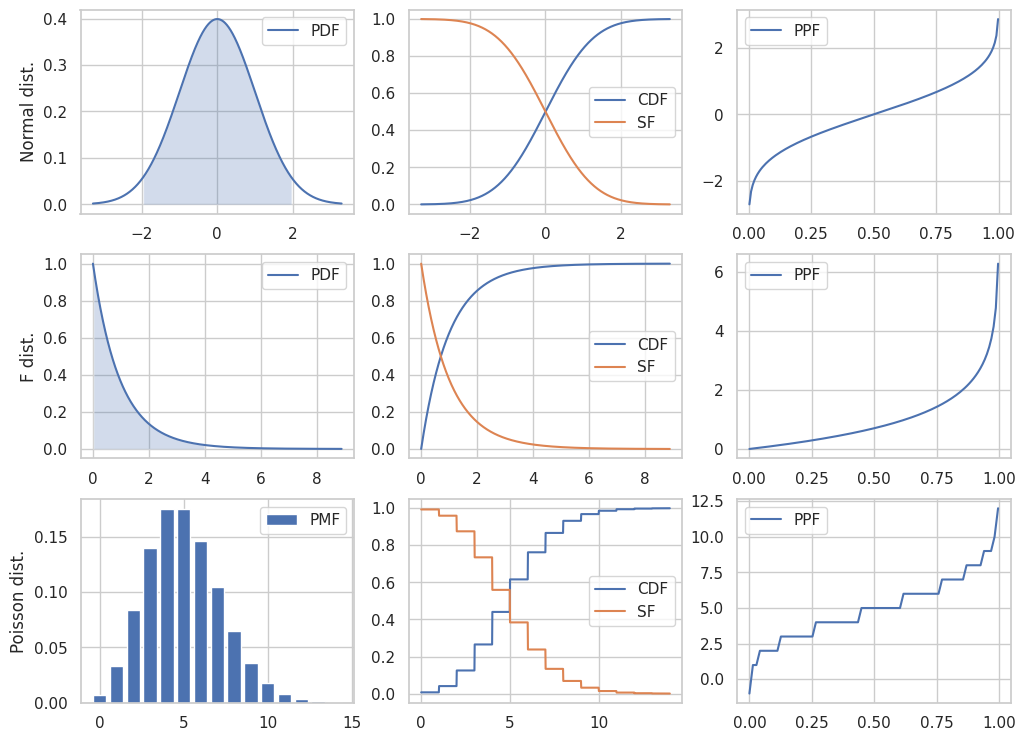

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(12, 9))
X = stats.norm()
plot_rv_distribution(X, axes=axes[0, :])
axes[0, 0].set_ylabel("Normal dist.")
X = stats.f(2, 50)
plot_rv_distribution(X, axes=axes[1, :])
axes[1, 0].set_ylabel("F dist.")
X = stats.poisson(5)
plot_rv_distribution(X, axes=axes[2, :])
axes[2, 0].set_ylabel("Poisson dist.")

An alternative way to use the random variable classes in SciPy’s stats module is to use class methods, for example, stats.norm.mean, and pass the distribution parameters as arguments (often loc and scale, as in this example for normally distributed values):

In [12]:
stats.norm.stats(loc=2, scale=0.5)

(2.0, 0.25)

which gives the same result as first creating an instance and then calling the corresponding method:

In [13]:
stats.norm(loc=1, scale=0.5).stats()

(1.0, 0.25)

Most methods in the rv_discrete and rv_continuous classes can be used as class methods in this way.

So far we have only looked at properties of the distribution function of random variables. Note that although a distribution function describes a random variable, the distribution itself is fully deterministic. To draw random numbers that are distributed according to the given probability distribution, we can use the rvs (random variable sample) method. It takes as argument the shape of the required array (can be an integer for a vector or a tuple of dimension lengths for a higher-dimensional array). Here we use rvs(10) to generate a one-dimensional array with ten values:

In [14]:
X = stats.norm(1, 0.5)
X.rvs(10)   

array([-0.1230215 ,  0.80984125,  0.41883032,  1.83613925,  1.16664031,
        1.65731823,  1.50208267,  1.64550704,  0.0742626 ,  0.9891184 ])

To see that the resulting random numbers indeed are distributed according to the corresponding probability distribution function, we can graph a histogram of a large number of samples of a random variable and compare it to the probability distribution function. Again, to be able to do this easily for samples of several random variables, we create a function plot_dist_samples for this purpose. This function uses the interval method to obtain a suitable plot range for a given random variable object.

In [15]:
def plot_dist_samples(X, X_samples, title=None, ax=None):
    """ Plot the PDF and histogram of samples of a continuous random variable"""
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 4))

    x_lim = X.interval(.99)
    x = np.linspace(*x_lim, num=100)

    ax.plot(x, X.pdf(x), label="PDF", lw=3)
    ax.hist(X_samples, label="samples", density=1, bins=75)
    ax.set_xlim(*x_lim)
    ax.legend()

    if title:
        ax.set_title(title)
    return ax

Note that in this function we have used the tuple unpacking syntax *x_lim, which distributes the elements in the tuple x_lim to different arguments for the function. In this case it is equivalent to np.linspace(x_lim[0], x_lim[1], num=100).

Next we use this function to visualize 2000 samples of three random variables with different distributions: here we use the Student’s t distribution, the χ2 distribution, and the exponential distribution, and the results are shown in Figure 13-3. Since 2000 is a fairly large sample, the histogram graphs of the samples coincide well with the probability distribution function. With an even larger number of samples, the agreement can be expected to be even better.

<Axes: title={'center': 'exponential dist.'}>

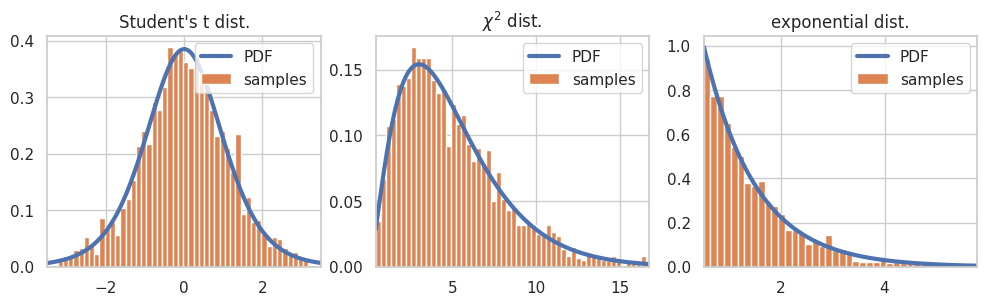

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
N = 2000

# Student's t distribution
X = stats.t(7.0)
plot_dist_samples(X, X.rvs(N), "Student's t dist.", ax=axes[0])

# The chisquared distribution
X = stats.chi2(5.0)
plot_dist_samples(X, X.rvs(N), r"$\chi^2$ dist.", ax=axes[1])

# The exponential distribution
X = stats.expon(0.5)
plot_dist_samples(X, X.rvs(N), "exponential dist.", ax=axes[2]) 

The opposite of drawing random samples from a known distribution function is to fit given probability distribution with unknown parameters to a set of data points. In such a fit, we typically wish to optimize the unknown parameters such that the likelihood of observing the given data is maximized. This is called a maximum likelihood fit. Many of the random variable classes in the SciPy stats module implements the method fit that performs such a fitting to given data. As a first example, consider drawing 500 random samples from the χ2 distribution with five degrees of freedom (df=5) and then refitting the random variables to the χ2 distribution using the fit method .

In [17]:
X = stats.chi2(df=5)
X_samples = X.rvs(500)
df, loc, scale = stats.chi2.fit(X_samples)
df, loc, scale

(6.152660822918632, -0.16413864027493735, 0.8417404369016392)

In [18]:
Y = stats.chi2(df=df, loc=loc, scale=scale)

The fit method returns the maximum likelihood parameters of the distribution, for the given data. We can pass on those parameters to the initializer of the stats.chi2 to create a new random variable instance Y. The probability distribution of Y should resemble the probability distribution of the original random variable X. To verify this we can plot the probability distribution functions for both random variables. 

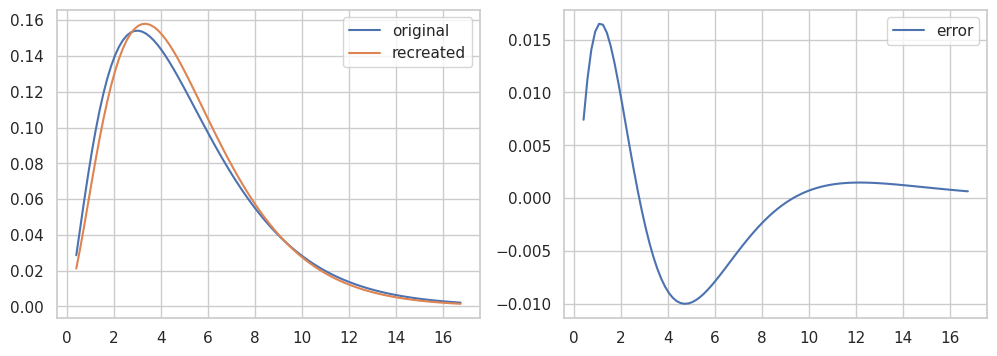

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
x_lim = X.interval(.99)
x = np.linspace(*x_lim, num=100)

axes[0].plot(x, X.pdf(x), label="original")
axes[0].plot(x, Y.pdf(x), label="recreated")
axes[0].legend()

axes[1].plot(x, X.pdf(x) - Y.pdf(x), label="error")
axes[1].legend()

*Original and recreated probability distribution function (left) and the error (right), from a maximum likelihood fit of 500 random samples of the original distribution*